In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd
import datetime as dt


## Reflect Tables into SQLALchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
connection = engine.connect()

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
calc_temps_year=(calc_temps('2016-05-01', '2017-04-30'))
calc_temps_year

[(58.0, 74.30474531998259, 84.0)]

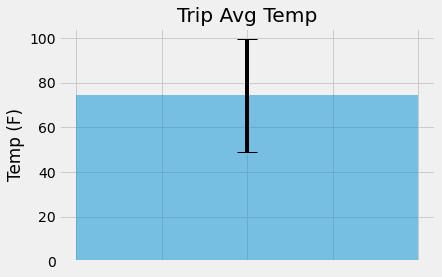

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# calculate the peak-to-peak value

error = 84.0 - 58.8

# Build the plot

fig, ax = plt.subplots()
ax.bar(1, 74.30,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Temp (F)')
ax.set_xticklabels([])
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)
plt.show()


### Daily Rainfall Average

In [55]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain_station = pd.read_sql("SELECT s.station,s.name,s.latitude,s.longitude,s.elevation,sum(m.prcp) as 'Total Rainfall'\
                            FROM station s\
                            JOIN measurement m ON(s.station = m.station)\
                            WHERE m.date BETWEEN '2015-04-30' AND '2016-05-01'\
                            GROUP BY s.station\
                            ORDER BY SUM(m.prcp) DESC" , connection)
rain_station.head(10)

,station,name,latitude,longitude,elevation,Total Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,163.69
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,83.50
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,55.06
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,48.46
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,41.92
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,16.17
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,4.47
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,3.34
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.00


In [191]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("05-01")


[(65.0, 72.75925925925925, 79.0)]

In [189]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called normals
normals=[]

# Set the start and end date of the trip
start_date = '2016-04-25'
end_date = '2016-05-01'

# Use the start and end date to create a range of dates

trip_dates=pd.date_range(start='2016-04-25', end='2016-05-01')


# Strip off the year and save a list of strings in the format %m-%d

for dateinindex in trip_dates:
    #convert date to mm-dd
    normals.append(str(dateinindex)[5:10])

# Use the `daily_normals` function to calculate the normals for each date string 
testing = []

for x in normals:
    print(x, daily_normals(x))
    xt = []
    xt.append(x)
    for listitem in daily_normals(x):
        for i in listitem:
            xt.append(i)
    testing.append(xt)
    
testing
# and append the results to a list called `normals`.
# results= normals + 
# print(results)

04-25 [(66.0, 73.96551724137932, 83.0)]
04-26 [(66.0, 74.01724137931035, 81.0)]
04-27 [(65.0, 72.87272727272727, 81.0)]
04-28 [(63.0, 73.46428571428571, 79.0)]
04-29 [(66.0, 73.30357142857143, 81.0)]
04-30 [(58.0, 71.5576923076923, 78.0)]
05-01 [(65.0, 72.75925925925925, 79.0)]


[['04-25', 66.0, 73.96551724137932, 83.0],
 ['04-26', 66.0, 74.01724137931035, 81.0],
 ['04-27', 65.0, 72.87272727272727, 81.0],
 ['04-28', 63.0, 73.46428571428571, 79.0],
 ['04-29', 66.0, 73.30357142857143, 81.0],
 ['04-30', 58.0, 71.5576923076923, 78.0],
 ['05-01', 65.0, 72.75925925925925, 79.0]]

In [216]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(testing, columns=['date','tmin', 'tavg', 'tmax'], index=trip_dates)  
final_data=normals_df.drop(columns=['date'])
final_data

,tmin,tavg,tmax
2016-04-25,66.0,73.965517,83.0
2016-04-26,66.0,74.017241,81.0
2016-04-27,65.0,72.872727,81.0
2016-04-28,63.0,73.464286,79.0
2016-04-29,66.0,73.303571,81.0
2016-04-30,58.0,71.557692,78.0
2016-05-01,65.0,72.759259,79.0


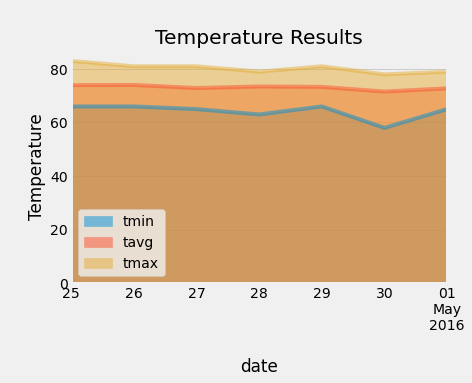

In [226]:
# Plot the daily normals as an area plot with `stacked=False`

x = final_data.plot.area(stacked = False)
plt.title('\nTemperature Results')
plt.xlabel('\ndate')
plt.ylabel('\nTemperature')
plt.show()

## Close Session

In [223]:
# Close Session
session.close()